Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

### Data

In [25]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [26]:
print(mnist.keys())
print([type(mnist[key]) for key in mnist.keys()])

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>, <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>, <class 'list'>, <class 'list'>, <class 'str'>, <class 'dict'>, <class 'str'>]


In [27]:
X, y = mnist["data"], mnist["target"]
print(X.shape, type(X))
print(y.shape, type(y))

(70000, 784) <class 'pandas.core.frame.DataFrame'>
(70000,) <class 'pandas.core.series.Series'>


In [28]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

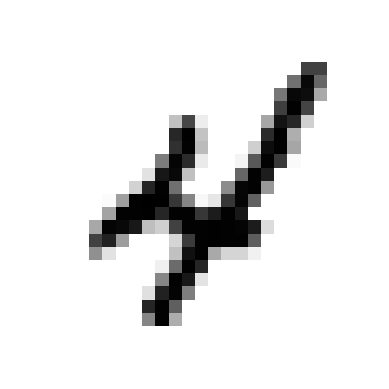

In [30]:
import matplotlib.pyplot as plt

image_vector = X.loc[9]
image = image_vector.to_numpy().reshape(28, 28)

plt.imshow(image, cmap="binary")
plt.axis("off")

In [31]:
y[9]

'4'

In [32]:
y = y.astype(int)

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Binary Classifier